In [3]:
import pandas as pd 
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt 
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (15,7)
import seaborn as sns

In [4]:
df = pd.read_excel('data.xlsx')

In [49]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [6]:
df = df[['ID', 'Название сделки', 'Имя', 'Продавец', 'Этап сделки',
       'Дата создания', 'Продукт', 'Цена со скидкой', 'Цена без скидки',
       'Причина Отказа', 'Страна клиента', 'utm_source']]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               524 non-null    int64  
 1   Название сделки  524 non-null    object 
 2   Имя              524 non-null    object 
 3   Продавец         524 non-null    object 
 4   Этап сделки      524 non-null    object 
 5   Дата создания    524 non-null    object 
 6   Продукт          524 non-null    object 
 7   Цена со скидкой  522 non-null    float64
 8   Цена без скидки  522 non-null    float64
 9   Причина Отказа   416 non-null    object 
 10  Страна клиента   524 non-null    object 
 11  utm_source       524 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 49.2+ KB


In [57]:
df['Дата создания'].head(1)

0    21.01.2023 18:13:08
Name: Дата создания, dtype: object

In [65]:
 #format='%d%m%y H%M%S')

#df['Дата создания'].dt.strftime('%d.%m.%y %H:%M:%S')

df['Дата создания'] = pd.to_datetime(df['Дата создания'], format="%d.%m.%Y %H:%M:%S")

In [21]:
df['Дата создания'] = df['Дата создания'].astype('datetime64')

/var/folders/jy/3_5sjgr138bcfkgnl82l_rvr0000gn/T/ipykernel_26439/3991716992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Дата создания'] = df['Дата создания'].astype('datetime64')


In [66]:
df['month'] = df['Дата создания'].dt.to_period("M")

In [67]:
df.head()

,ID,Название сделки,Имя,Продавец,Этап сделки,Дата создания,Продукт,Цена со скидкой,Цена без скидки,Причина Отказа,Страна клиента,utm_source,month
0,332,Аналитик данных,Гульнара,Косичкина,Закрыто и не реализовано,2023-01-21 18:13:08,Аналитик данных,79800.0,115000.0,Дорого,Кыргызстан,cpa,2023-01
1,358,Аналитик данных,Татьяна,Иванова,Закрыто и не реализовано,2023-01-21 16:02:08,Аналитик данных,79800.0,115000.0,Дорого,Россия,influence,2023-01
2,382,Аналитик данных,Максим,Смирнов,Закрыто и не реализовано,2023-01-21 14:10:04,Аналитик данных,79800.0,115000.0,Дорого,Россия,influence,2023-01
3,389,Аналитик данных,Фаниль,Гарилова,Закрыто и не реализовано,2023-01-21 13:36:28,Аналитик данных,79800.0,115000.0,Дорого,Россия,vkreklama,2023-01
4,402,Бизнес-аналитик ПРО,Дмитрий,Сидоров,Закрыто и не реализовано,2023-01-21 12:36:20,Аналитик данных,79800.0,133000.0,Дорого,Кыргызстан,vkpulse,2023-01


In [68]:
df.shape

(524, 13)

In [69]:
df.ID.nunique()

524

In [70]:
df.sample(10)

,ID,Название сделки,Имя,Продавец,Этап сделки,Дата создания,Продукт,Цена со скидкой,Цена без скидки,Причина Отказа,Страна клиента,utm_source,month
513,11095,Аналитик данных,Фаниль,Тигровский,Закрыто и не реализовано,2022-12-13 09:08:34,Аналитик данных,64500.0,129000.0,Сейчас не актуально,Россия,vkpulse,2022-12
0,332,Аналитик данных,Гульнара,Косичкина,Закрыто и не реализовано,2023-01-21 18:13:08,Аналитик данных,79800.0,115000.0,Дорого,Кыргызстан,cpa,2023-01
172,3514,Аналитик данных,Фаниль,Рикошетов,Закрыто и не реализовано,2023-01-12 08:20:51,Аналитик данных,79800.0,115000.0,Отложенный спрос,Россия,influence,2023-01
255,4682,Аналитик данных,Кира,Рикошетов,Закрыто и не реализовано,2023-01-08 17:37:27,Аналитик данных,79800.0,149000.0,Не смогли дозвониться,Россия,vk,2023-01
396,7859,Аналитик данных,Анастасия,Тигровский,Закрыто и не реализовано,2022-12-25 20:41:39,Аналитик данных,44700.0,149000.0,Не смогли дозвониться,Россия,vkpulse,2022-12
492,10364,Аналитик данных,Анастасия,Валиулин,Закрыто и не реализовано,2022-12-15 20:27:59,Аналитик данных,64500.0,129000.0,Отложенный спрос,Беларусь,smm,2022-12
248,4472,Аналитик данных,Ольга,Смирнов,Квалифицирован,2023-01-09 11:52:16,Аналитик данных,79800.0,149000.0,NaN,Молдова,vkpulse,2023-01
289,5722,Аналитик данных,Гульнара,Кривоногов,Закрыто и не реализовано,2023-01-04 09:18:01,Аналитик данных,79800.0,149000.0,Не смогли дозвониться,Россия,vkpulse,2023-01
216,3978,Аналитик данных,Ольга,Иванова,Закрыто и не реализовано,2023-01-10 20:24:27,Аналитик данных,79800.0,115000.0,Дорого,Кыргызстан,influence,2023-01
485,10118,Аналитик данных,Кира,Косичкина,Успешно реализовано,2022-12-16 16:07:10,Аналитик данных,64500.0,129000.0,NaN,Россия,smm,2022-12


In [82]:
ids_grouped = df.groupby(['month', 'Этап сделки']).agg({'ID':'nunique'}).reset_index().set_index('month')\
    .join(df.groupby(['month']).agg({'ID':'nunique'})\
        .rename(columns = {'ID':'ids_total'}))

In [89]:
ids_grouped['state_share'] = round(ids_grouped['ID']/ids_grouped['ids_total']*100,2)

In [90]:
ids_grouped

,Этап сделки,ID,ids_total,state_share
month,,,,
2022-12,Взяли в работу,1,214,0.47
2022-12,Закрыто и не реализовано,170,214,79.44
2022-12,Квалифицирован,11,214,5.14
2022-12,Контакт установлен,3,214,1.40
2022-12,Предоплата получена,6,214,2.80
2022-12,Успешно реализовано,23,214,10.75
2023-01,Взяли в работу,11,310,3.55
2023-01,Закрыто и не реализовано,246,310,79.35
2023-01,Квалифицирован,32,310,10.32


In [202]:
ids_grouped

,Этап сделки,ID,ids_total,state_share
month,,,,
2022-12,Взяли в работу,1,214,0.47
2022-12,Закрыто и не реализовано,170,214,79.44
2022-12,Квалифицирован,11,214,5.14
2022-12,Контакт установлен,3,214,1.40
2022-12,Предоплата получена,6,214,2.80
2022-12,Успешно реализовано,23,214,10.75
2023-01,Взяли в работу,11,310,3.55
2023-01,Закрыто и не реализовано,246,310,79.35
2023-01,Квалифицирован,32,310,10.32


In [94]:
ids_grouped[ids_grouped['Этап сделки']=='Успешно реализовано']

,Этап сделки,ID,ids_total,state_share
month,,,,
2022-12,Успешно реализовано,23,214,10.75
2023-01,Успешно реализовано,14,310,4.52


In [96]:
ids_grouped[ids_grouped['Этап сделки']=='Закрыто и не реализовано']

,Этап сделки,ID,ids_total,state_share
month,,,,
2022-12,Закрыто и не реализовано,170,214,79.44
2023-01,Закрыто и не реализовано,246,310,79.35


In [106]:
ids_grouped[~ids_grouped['Этап сделки'].isin(['Закрыто и не реализовано', 'Успешно реализовано'])]

,Этап сделки,ID,ids_total,state_share
month,,,,
2022-12,Взяли в работу,1,214,0.47
2022-12,Квалифицирован,11,214,5.14
2022-12,Контакт установлен,3,214,1.40
2022-12,Предоплата получена,6,214,2.80
2023-01,Взяли в работу,11,310,3.55
2023-01,Квалифицирован,32,310,10.32
2023-01,Контакт установлен,7,310,2.26


In [210]:
df[df['Этап сделки']!='Закрыто и не реализовано']

,ID,Название сделки,Имя,Продавец,Этап сделки,Дата создания,Продукт,Цена со скидкой,Цена без скидки,Причина Отказа,Страна клиента,utm_source,month,disc
11,545,Аналитик данных,Фаниль,Рикошетов,Успешно реализовано,2023-01-20 19:01:29,Аналитик данных,79800.0,115000.0,NaN,Россия,smm,2023-01,0.306087
19,726,Аналитик данных,Фаниль,Иванова,Взяли в работу,2023-01-20 09:38:18,Аналитик данных,79800.0,115000.0,NaN,Россия,vkpulse,2023-01,0.306087
20,741,Аналитик данных,Дмитрий,Смирнов,Контакт установлен,2023-01-20 07:51:19,Аналитик данных,79800.0,115000.0,NaN,Россия,vkpulse,2023-01,0.306087
25,796,Аналитик данных,Татьяна,Кико,Квалифицирован,2023-01-20 00:53:47,Аналитик данных,79800.0,115000.0,NaN,Россия,influence,2023-01,0.306087
26,821,Аналитик данных,Максим,Бикмукаметова,Квалифицирован,2023-01-19 22:02:02,Аналитик данных,79800.0,115000.0,NaN,Россия,influence,2023-01,0.306087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,11019,Аналитик данных,Кира,Кривоногов,Предоплата получена,2022-12-13 14:41:39,Аналитик данных,74500.0,149000.0,NaN,Россия,influence,2022-12,0.500000
515,11197,Аналитик данных,Анастасия,Беляев,Успешно реализовано,2022-12-12 16:58:19,Аналитик данных,64500.0,129000.0,NaN,Россия,smm,2022-12,0.500000
517,11248,Аналитик данных,Ольга,Гарилова,Успешно реализовано,2022-12-12 12:59:23,Аналитик данных,51600.0,129000.0,NaN,Кипр,vkpulse,2022-12,0.600000
518,11266,Аналитик данных,Гульнара,Водопроводников,Квалифицирован,2022-12-12 11:49:09,Аналитик данных,64500.0,129000.0,NaN,Россия,influence,2022-12,0.500000


получается, что не количество отказов выросло, а упало количество успешных продаж. 
то есть сделки залетели в другое направление 

In [110]:
df['Причина Отказа'].value_counts(normalize=True)

Дорого                                       0.348558
Не смогли дозвониться                        0.209135
Отложенный спрос                             0.144231
Сейчас не актуально                          0.115385
Интересовала только программа обучения       0.043269
Не отвечает после квалификации               0.036058
Не подходит формат или программа обучения    0.028846
Некорректные данные                          0.026442
Не оставлял заявку                           0.024038
Другое                                       0.024038
Name: Причина Отказа, dtype: float64

In [213]:
print("ЯНВАРЬ")
df[df['month']=='2023-01']['Причина Отказа'].value_counts(normalize=True).head(5)

ЯНВАРЬ


Дорого                                    0.524390
Не смогли дозвониться                     0.174797
Отложенный спрос                          0.093496
Сейчас не актуально                       0.077236
Интересовала только программа обучения    0.036585
Name: Причина Отказа, dtype: float64

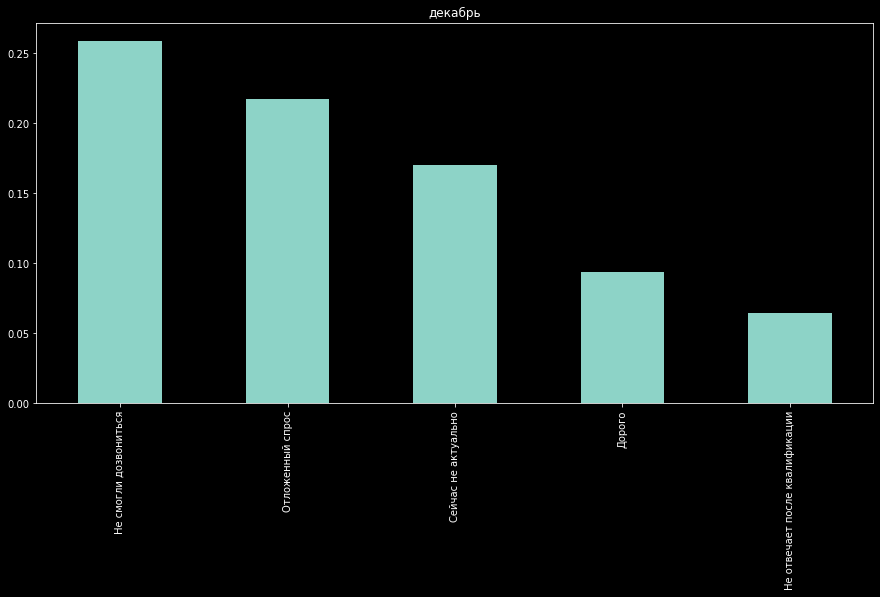

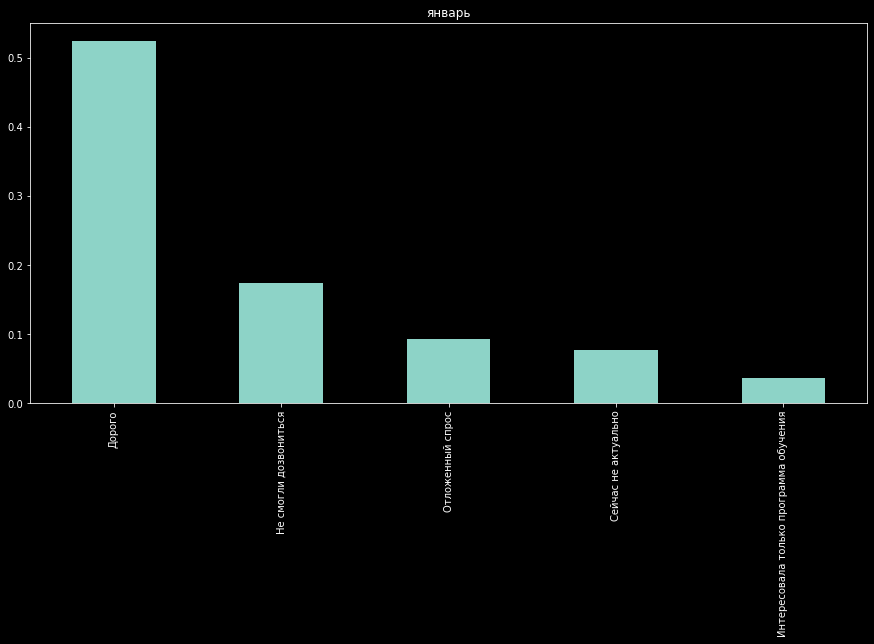

In [204]:
plt.title('декабрь')
df[df['month']=='2022-12']['Причина Отказа'].value_counts(normalize=True).head(5).plot(kind='bar')
plt.show()
plt.title('январь')
df[df['month']=='2023-01']['Причина Отказа'].value_counts(normalize=True).head(5).plot(kind='bar')
plt.show()

In [128]:
df['disc'] = (df['Цена без скидки']- df['Цена со скидкой'])/df['Цена без скидки']

In [140]:
df['disc']

0      0.306087
1      0.306087
2      0.306087
3      0.306087
4      0.400000
         ...   
519    0.500000
520    0.500000
521    0.500000
522    0.500000
523    0.500000
Name: disc, Length: 524, dtype: float64

<AxesSubplot:xlabel='Дата создания', ylabel='disc'>

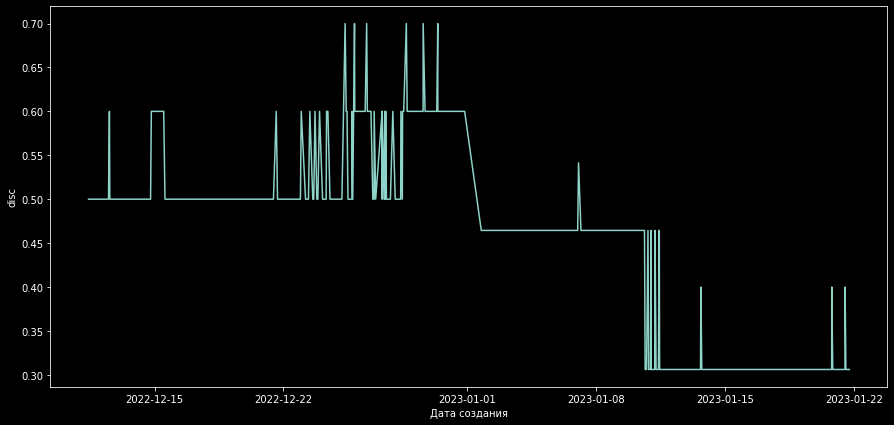

In [142]:
sns.lineplot(data = df,  x = 'Дата создания', y='disc')

In [143]:
df.groupby('month').agg({'disc':'mean'})

,disc
month,
2022-12,0.541981
2023-01,0.354747


In [145]:
df.groupby('month').agg({'Цена без скидки':'mean'})

,Цена без скидки
month,
2022-12,135500.00000
2023-01,125454.83871


In [146]:
df.groupby('month').agg({'Цена со скидкой':'mean'})

,Цена со скидкой
month,
2022-12,61660.849057
2023-01,79800.000000


сильно упал размер скидки, если в декабре он был 54%, то сейчас 35%

хоть общая цена и снизилась, все равно продавать без скидки слоднее, так как итговая цена повысилась. 

In [152]:
df[df['Цена без скидки'].isnull()]

,ID,Название сделки,Имя,Продавец,Этап сделки,Дата создания,Продукт,Цена со скидкой,Цена без скидки,Причина Отказа,Страна клиента,utm_source,month,disc
394,7851,Каталог,Фаниль,Беляев,Закрыто и не реализовано,2022-12-25 21:17:59,Аналитик данных,NaN,NaN,Отложенный спрос,Россия,vkpulse,2022-12,NaN
401,7950,Excel,Максим,Водопроводников,Закрыто и не реализовано,2022-12-25 13:23:47,Аналитик данных,NaN,NaN,Отложенный спрос,Россия,vk,2022-12,NaN


почти все со скидкой

<AxesSubplot:xlabel='Дата создания', ylabel='Цена без скидки'>

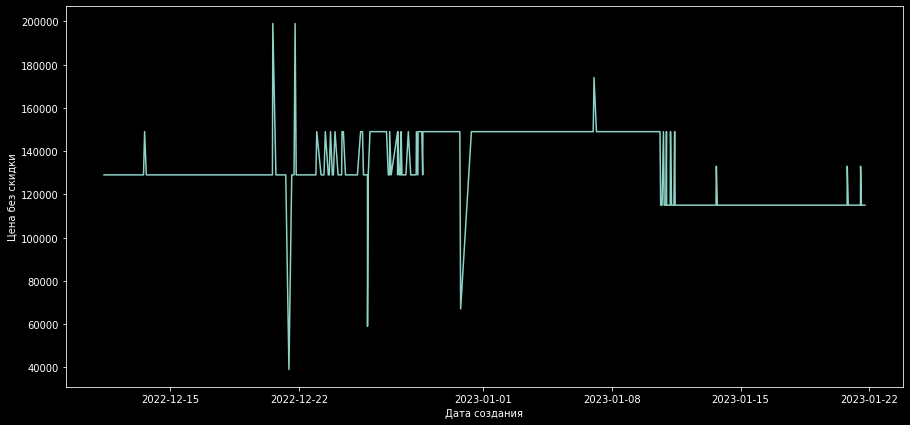

In [155]:
sns.lineplot(data = df,  x = 'Дата создания', y='Цена без скидки')

<AxesSubplot:xlabel='Дата создания', ylabel='Цена со скидкой'>

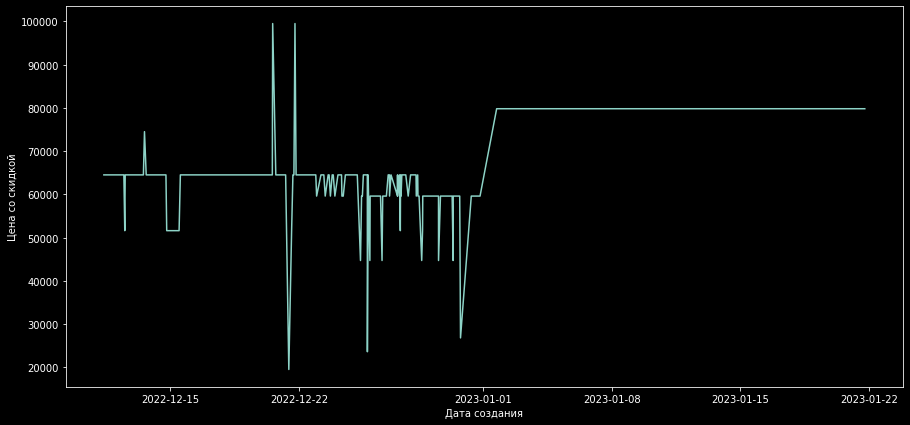

In [156]:
sns.lineplot(data = df,  x = 'Дата создания', y='Цена со скидкой')

In [164]:
df.utm_source.unique()

array(['cpa', 'influence', 'vkreklama', 'vkpulse', 'vk', 'telegram',
       'smm', 'yandex'], dtype=object)

In [166]:
utm_grouped = df.groupby(['month', 'utm_source']).agg({'ID':'nunique'}).reset_index().set_index('month')\
    .join(df.groupby(['month']).agg({'ID':'nunique'})\
        .rename(columns = {'ID':'ids_total'}))

In [168]:
utm_grouped['share_utm'] = round(utm_grouped['ID']/utm_grouped['ids_total']*100,2)
utm_grouped

,utm_source,ID,ids_total,share_utm
month,,,,
2022-12,cpa,7,214,3.27
2022-12,influence,65,214,30.37
2022-12,smm,36,214,16.82
2022-12,telegram,46,214,21.50
2022-12,vk,1,214,0.47
2022-12,vkpulse,37,214,17.29
2022-12,vkreklama,1,214,0.47
2022-12,yandex,21,214,9.81
2023-01,cpa,29,310,9.35


In [172]:
utm_grouped.reset_index().pivot_table(index = 'utm_source', columns='month', values = 'share_utm')

month,2022-12,2023-01
utm_source,,
cpa,3.27,9.35
influence,30.37,29.03
smm,16.82,10.00
telegram,21.50,14.84
vk,0.47,0.97
vkpulse,17.29,33.23
vkreklama,0.47,2.58
yandex,9.81,NaN


In [173]:
df

,ID,Название сделки,Имя,Продавец,Этап сделки,Дата создания,Продукт,Цена со скидкой,Цена без скидки,Причина Отказа,Страна клиента,utm_source,month,disc
0,332,Аналитик данных,Гульнара,Косичкина,Закрыто и не реализовано,2023-01-21 18:13:08,Аналитик данных,79800.0,115000.0,Дорого,Кыргызстан,cpa,2023-01,0.306087
1,358,Аналитик данных,Татьяна,Иванова,Закрыто и не реализовано,2023-01-21 16:02:08,Аналитик данных,79800.0,115000.0,Дорого,Россия,influence,2023-01,0.306087
2,382,Аналитик данных,Максим,Смирнов,Закрыто и не реализовано,2023-01-21 14:10:04,Аналитик данных,79800.0,115000.0,Дорого,Россия,influence,2023-01,0.306087
3,389,Аналитик данных,Фаниль,Гарилова,Закрыто и не реализовано,2023-01-21 13:36:28,Аналитик данных,79800.0,115000.0,Дорого,Россия,vkreklama,2023-01,0.306087
4,402,Бизнес-аналитик ПРО,Дмитрий,Сидоров,Закрыто и не реализовано,2023-01-21 12:36:20,Аналитик данных,79800.0,133000.0,Дорого,Кыргызстан,vkpulse,2023-01,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,11317,Аналитик данных,Татьяна,Тигровский,Закрыто и не реализовано,2022-12-12 03:47:49,Аналитик данных,64500.0,129000.0,Не смогли дозвониться,Россия,influence,2022-12,0.500000
520,11345,Аналитик данных,Максим,Рикошетов,Закрыто и не реализовано,2022-12-11 21:39:29,Аналитик данных,64500.0,129000.0,Не смогли дозвониться,Румыния,telegram,2022-12,0.500000
521,11358,Аналитик данных,Фаниль,Бикмукаметова,Закрыто и не реализовано,2022-12-11 20:07:24,Аналитик данных,64500.0,129000.0,Не смогли дозвониться,Россия,influence,2022-12,0.500000
522,11427,Аналитик данных,Дмитрий,Кико,Закрыто и не реализовано,2022-12-11 11:02:54,Аналитик данных,64500.0,129000.0,Не смогли дозвониться,Кипр,vkpulse,2022-12,0.500000


In [176]:
country_grouped = df.groupby(['month', 'Страна клиента']).agg({'ID':'nunique'}).reset_index().set_index('month')\
    .join(df.groupby(['month']).agg({'ID':'nunique'})\
        .rename(columns = {'ID':'ids_total'}))

country_grouped['share_country'] = round(country_grouped['ID']/country_grouped['ids_total']*100,2)
country_grouped


,Страна клиента,ID,ids_total,share_country
month,,,,
2022-12,Беларусь,4,214,1.87
2022-12,Британия,1,214,0.47
2022-12,Германия,5,214,2.34
2022-12,Египет,1,214,0.47
2022-12,Израиль,1,214,0.47
2022-12,Италия,1,214,0.47
2022-12,Казахстан,4,214,1.87
2022-12,Канада,1,214,0.47
2022-12,Кипр,3,214,1.40


In [184]:
country_grouped.loc['2022-12'].sort_values(by = 'share_country', ascending=False).head()

,Страна клиента,ID,ids_total,share_country
month,,,,
2022-12,Россия,174,214,81.31
2022-12,Германия,5,214,2.34
2022-12,Украина,5,214,2.34
2022-12,Беларусь,4,214,1.87
2022-12,Казахстан,4,214,1.87


In [185]:
country_grouped.loc['2023-01'].sort_values(by = 'share_country', ascending=False).head()

,Страна клиента,ID,ids_total,share_country
month,,,,
2023-01,Россия,174,310,56.13
2023-01,Кыргызстан,84,310,27.10
2023-01,Казахстан,11,310,3.55
2023-01,Украина,7,310,2.26
2023-01,Беларусь,4,310,1.29


In [188]:
sales_grouped = df.groupby(['month', 'Продавец']).agg({'ID':'nunique'}).reset_index().set_index('month')\
    .join(df.groupby(['month']).agg({'ID':'nunique'})\
        .rename(columns = {'ID':'ids_total'}))

sales_grouped['share_country'] = round(sales_grouped['ID']/sales_grouped['ids_total']*100,2)
sales_grouped


,Продавец,ID,ids_total,share_country
month,,,,
2022-12,Беляев,16,214,7.48
2022-12,Бикмукаметова,17,214,7.94
2022-12,Валиулин,18,214,8.41
2022-12,Водопроводников,16,214,7.48
2022-12,Гарилова,16,214,7.48
2022-12,Иванова,16,214,7.48
2022-12,Кико,17,214,7.94
2022-12,Косичкина,16,214,7.48
2022-12,Кривоногов,15,214,7.01


In [190]:
sales_grouped.loc['2022-12'].sort_values(by = 'share_country', ascending=False).head()

,Продавец,ID,ids_total,share_country
month,,,,
2022-12,Валиулин,18,214,8.41
2022-12,Рикошетов,18,214,8.41
2022-12,Бикмукаметова,17,214,7.94
2022-12,Кико,17,214,7.94
2022-12,Сидоров,17,214,7.94


In [192]:
sales_grouped.loc['2023-01'].sort_values(by = 'share_country', ascending=False).head()

,Продавец,ID,ids_total,share_country
month,,,,
2023-01,Косичкина,26,310,8.39
2023-01,Смирнов,26,310,8.39
2023-01,Гарилова,25,310,8.06
2023-01,Иванова,25,310,8.06
2023-01,Сидоров,25,310,8.06


План: 

1. Посмотреть на саму выгрукзку: сравнивать будем месяц к месяцу (или может неделю к неделе?) (+)
2. Посмотреть возможно ли построить воронку продаж (один клиент долен пройти по стадиям 1,2,3) (+)
3. Посмотреть на количество отказов (относительно и абсолюты) у уникальных клинетов  (+)
4. Если увеличилось количество отказов, то какая внесла наибольший вклад? А какая больше всего поменялась? (+)
5. Посмотреть на деньги: цена, размер скидки в %, как часто предлагали скидку в % к уникальным пользователям. (+)
6. Посмотреть на все фичи в динамике

In [196]:
df

,ID,Название сделки,Имя,Продавец,Этап сделки,Дата создания,Продукт,Цена со скидкой,Цена без скидки,Причина Отказа,Страна клиента,utm_source,month,disc
0,332,Аналитик данных,Гульнара,Косичкина,Закрыто и не реализовано,2023-01-21 18:13:08,Аналитик данных,79800.0,115000.0,Дорого,Кыргызстан,cpa,2023-01,0.306087
1,358,Аналитик данных,Татьяна,Иванова,Закрыто и не реализовано,2023-01-21 16:02:08,Аналитик данных,79800.0,115000.0,Дорого,Россия,influence,2023-01,0.306087
2,382,Аналитик данных,Максим,Смирнов,Закрыто и не реализовано,2023-01-21 14:10:04,Аналитик данных,79800.0,115000.0,Дорого,Россия,influence,2023-01,0.306087
3,389,Аналитик данных,Фаниль,Гарилова,Закрыто и не реализовано,2023-01-21 13:36:28,Аналитик данных,79800.0,115000.0,Дорого,Россия,vkreklama,2023-01,0.306087
4,402,Бизнес-аналитик ПРО,Дмитрий,Сидоров,Закрыто и не реализовано,2023-01-21 12:36:20,Аналитик данных,79800.0,133000.0,Дорого,Кыргызстан,vkpulse,2023-01,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,11317,Аналитик данных,Татьяна,Тигровский,Закрыто и не реализовано,2022-12-12 03:47:49,Аналитик данных,64500.0,129000.0,Не смогли дозвониться,Россия,influence,2022-12,0.500000
520,11345,Аналитик данных,Максим,Рикошетов,Закрыто и не реализовано,2022-12-11 21:39:29,Аналитик данных,64500.0,129000.0,Не смогли дозвониться,Румыния,telegram,2022-12,0.500000
521,11358,Аналитик данных,Фаниль,Бикмукаметова,Закрыто и не реализовано,2022-12-11 20:07:24,Аналитик данных,64500.0,129000.0,Не смогли дозвониться,Россия,influence,2022-12,0.500000
522,11427,Аналитик данных,Дмитрий,Кико,Закрыто и не реализовано,2022-12-11 11:02:54,Аналитик данных,64500.0,129000.0,Не смогли дозвониться,Кипр,vkpulse,2022-12,0.500000


In [198]:
l = [1,2,3,4,5,67,7,88,8,9]

In [201]:
l[:-2]

[1, 2, 3, 4, 5, 67, 7, 88]

In [12]:
n = 10  #chunk row size
list_df = [df[i:i+n] for i in range(0,df.shape[0],n)]
df

,ID,Название сделки,Имя,Продавец,Этап сделки,Дата создания,Продукт,Цена со скидкой,Цена без скидки,Причина Отказа,Страна клиента,utm_source
0,332,Аналитик данных,Гульнара,Косичкина,Закрыто и не реализовано,21.01.2023 18:13:08,Аналитик данных,79800.0,115000.0,Дорого,Кыргызстан,cpa
1,358,Аналитик данных,Татьяна,Иванова,Закрыто и не реализовано,21.01.2023 16:02:08,Аналитик данных,79800.0,115000.0,Дорого,Россия,influence
2,382,Аналитик данных,Максим,Смирнов,Закрыто и не реализовано,21.01.2023 14:10:04,Аналитик данных,79800.0,115000.0,Дорого,Россия,influence
3,389,Аналитик данных,Фаниль,Гарилова,Закрыто и не реализовано,21.01.2023 13:36:28,Аналитик данных,79800.0,115000.0,Дорого,Россия,vkreklama
4,402,Бизнес-аналитик ПРО,Дмитрий,Сидоров,Закрыто и не реализовано,21.01.2023 12:36:20,Аналитик данных,79800.0,133000.0,Дорого,Кыргызстан,vkpulse
...,...,...,...,...,...,...,...,...,...,...,...,...
519,11317,Аналитик данных,Татьяна,Тигровский,Закрыто и не реализовано,12.12.2022 03:47:49,Аналитик данных,64500.0,129000.0,Не смогли дозвониться,Россия,influence
520,11345,Аналитик данных,Максим,Рикошетов,Закрыто и не реализовано,11.12.2022 21:39:29,Аналитик данных,64500.0,129000.0,Не смогли дозвониться,Румыния,telegram
521,11358,Аналитик данных,Фаниль,Бикмукаметова,Закрыто и не реализовано,11.12.2022 20:07:24,Аналитик данных,64500.0,129000.0,Не смогли дозвониться,Россия,influence
522,11427,Аналитик данных,Дмитрий,Кико,Закрыто и не реализовано,11.12.2022 11:02:54,Аналитик данных,64500.0,129000.0,Не смогли дозвониться,Кипр,vkpulse
